In [2]:
from matplotlib import pyplot as plt
import datetime
import numpy as np
import pandas as pd
import random
from scipy import stats

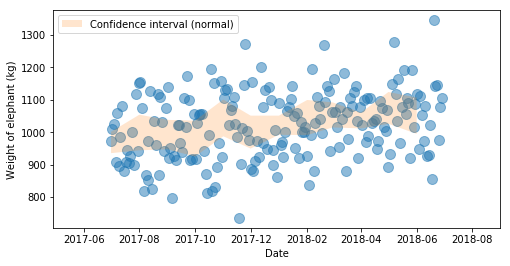

In [3]:
np.random.seed(41)

def add_gaussian_noise(mean=0, std=100, dist='normal'):
    """
    :param mean: mean
    :param std: standard deviation
    :return: simulated random gaussian noise
    """
    if dist == 'normal':
        return stats.norm.rvs(mean, std)
    else:
        skew_param = 100
        return stats.lognorm.rvs(2.627, 0, 0.1)

def generate_time_series(k=50, m=1000, n=200, start_date=datetime.date(2017, 7, 1), dist='skew'):
    """
    :param k: slope, increment in upwards/downwards trend (step size)
    :param m: y-intercept
    :param n: number of samples
    :param start_date: start point in time-series
    :return: 
    """
    xs = np.linspace(0, 1, n, endpoint=False)
    ys = [k * x + m + add_gaussian_noise(dist=dist) for x in xs]
    ts = [start_date + datetime.timedelta(x) * 365 for x in xs]
    return ys, ts

ys, ts = generate_time_series(dist='normal')

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(ts, ys, alpha=0.5, s=100)
ax.set_xlabel('Date')
ax.set_ylabel('Weight of elephant (kg)');

def calc_confidence_interval(observations_by_group):
    groups = list(sorted(observations_by_group.keys()))
    lo_bound = []
    hi_bound = []
    for group in groups:
        series = observations_by_group[group]
        mu, std, n = np.mean(series), np.std(series), len(series)
        lo_bound.append(mu - 1.96*std*n**-0.5)
        hi_bound.append(mu + 1.96*std*n**-0.5)
    return lo_bound, hi_bound, groups

d = pd.DataFrame({'t': ts, 'Weight (kg)': ys})
d['Month'] = d['t'].apply(lambda t: t.strftime('%Y-%m'))

observations_by_month = {}
for month, y in zip(d['Month'], d['Weight (kg)']):
    observations_by_month.setdefault(month, []).append(y)
lo_bound, hi_bound, groups = calc_confidence_interval(observations_by_month)
ax.fill_between(groups, lo_bound, hi_bound, alpha=0.2, label='Confidence interval (normal)')
ax.legend()

In [4]:
groups

['2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06']

In [5]:
ts

[datetime.date(2017, 7, 1),
 datetime.date(2017, 7, 2),
 datetime.date(2017, 7, 4),
 datetime.date(2017, 7, 6),
 datetime.date(2017, 7, 8),
 datetime.date(2017, 7, 10),
 datetime.date(2017, 7, 11),
 datetime.date(2017, 7, 13),
 datetime.date(2017, 7, 15),
 datetime.date(2017, 7, 17),
 datetime.date(2017, 7, 19),
 datetime.date(2017, 7, 21),
 datetime.date(2017, 7, 22),
 datetime.date(2017, 7, 24),
 datetime.date(2017, 7, 26),
 datetime.date(2017, 7, 28),
 datetime.date(2017, 7, 30),
 datetime.date(2017, 8, 1),
 datetime.date(2017, 8, 2),
 datetime.date(2017, 8, 4),
 datetime.date(2017, 8, 6),
 datetime.date(2017, 8, 8),
 datetime.date(2017, 8, 10),
 datetime.date(2017, 8, 11),
 datetime.date(2017, 8, 13),
 datetime.date(2017, 8, 15),
 datetime.date(2017, 8, 17),
 datetime.date(2017, 8, 19),
 datetime.date(2017, 8, 21),
 datetime.date(2017, 8, 22),
 datetime.date(2017, 8, 24),
 datetime.date(2017, 8, 26),
 datetime.date(2017, 8, 28),
 datetime.date(2017, 8, 30),
 datetime.date(2017, 9, 